# Even number classifier using MNIST data

In [6]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
#CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Sorting the dataset

In [2]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [3]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [4]:
mnist.data.shape

(70000, 784)

In [5]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [7]:
X.shape

(70000, 784)

In [8]:
y.shape

(70000,)

Saving figure some_digit_plot


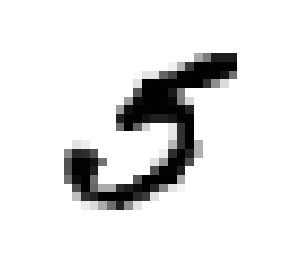

In [148]:
some_digit = X[36000]
some_digit2 = X[41000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [149]:
y[36000]

5

Saving figure some_digit_plot


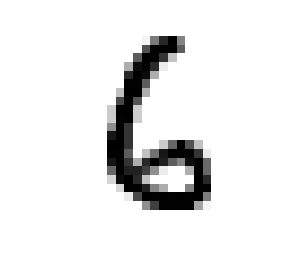

In [182]:
some_digit2 = X[41000]
some_digit_image = some_digit2.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [150]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [154]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
y_train

array([5, 9, 5, ..., 7, 0, 9], dtype=int8)

In [155]:

#y_train_5 = (y_train == 5 ) 
#y_test_5 = (y_test == 5)
#print(y_train_5[37000])
y_train_even = (y_train % 2 == 0 ) 
y_test_even = (y_test % 2 == 0)
print(y_train_even[36000])

False


In [170]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train, y_train_even)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

## Test case 1 testing for odd

In [179]:
pred = sgd_clf.predict([some_digit])


if(pred[0]):
    print(" digit is Even")
else:
    print(" digit is Odd")

 digit is Odd


## Accuracy 

In [185]:
from sklearn.model_selection import cross_val_score
acc= cross_val_score(sgd_clf, X_train, y_train_even, cv=3, scoring="accuracy")
print("Accuracy: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy: 0.85 (+/- 0.04)


## Test case 2 testing for even

In [186]:
pred = sgd_clf.predict([some_digit2])


if(pred[0]):
    print(" digit is Even")
else:
    print(" digit is Odd")

 digit is Even


In [187]:
from sklearn.model_selection import cross_val_score
acc= cross_val_score(sgd_clf, X_train, y_train_even, cv=3, scoring="accuracy")
print("Accuracy: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy: 0.85 (+/- 0.04)
